# Employee Attrition Rate using Regression

## Introduction

인공지능은 프로세스를 자동화하고, 비즈니스에 대한 통찰력을 모으고, 프로세스 속도를 높이기 위해 다양한 산업에서 사용되고 있습니다. 인공지능이 실제로 산업에 어떤 영향을 미치는지 실제 시나리오에서 인공지능의 사용을 연구하기 위해 Python을 사용할 것입니다.

직원은 조직에서 가장 중요한 존재입니다. 성공적인 직원들은 조직에 많은 것을 제공합니다. 이 노트북에서는 AI를 사용하여 직원의 이직률이나 회사가 직원을 유지할 수 있는 빈도를 예측해 볼 것입니다.


## Context

Hackerearth가 수집하여 [Kaggle](https://www.kaggle.com/blurredmachine/hackerearth-employee-attrition)에 업로드한 직원 감소율을 포함한 데이터 세트를 사용합니다. 회귀 분석을 사용하여 감소율을 예측하고 우리 모델이 얼마나 성공적인지 확인할 것입니다.


## Use Python to open csv files

[scikit-learn](https://scikit-learn.org/stable/)과 [pandas](https://pandas.pydata.org/)를 사용하여 데이터 세트를 작업합니다. Scikit-learn은 예측 데이터 분석을 위한 효율적인 도구를 제공하는 매우 유용한 기계 학습 라이브러리입니다. Pandas는 데이터 과학을 위한 인기 있는 Python 라이브러리입니다. 강력하고 유연한 데이터 구조를 제공하여 데이터 조작 및 분석을 더 쉽게 만듭니다.


## Import Libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error

### Dataset 가져오기

데이터 세트에는 직원 이직률이 포함되어 있습니다. 데이터 세트를 시각화해 보겠습니다.

In [2]:
train = pd.read_csv("[Dataset]_Module11_Train_(Employee).csv") 
test = pd.read_csv("[Dataset]_Module11_Test_(Employee).csv")

## Task 1: training set의 column 출력

In [ ]:
#yourcodehere

In [3]:
print(train.shape)
train.head()

(7000, 24)


,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


## Task2: describe 함수를 사용하여  training data set 에 대한 정보 가져오기

### Data 설명

데이터가 어떻게 분배되어 있는지 확인해 봅시다. 각 열의 평균값, 최대값, 최소값을 다른 특성들과 함께 시각화할 수 있습니다.

In [4]:
train.describe()


,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
count,6588.000000,7000.000000,6856.000000,7000.000000,7000.000000,7000.000000,7000.000000,6991.000000,6989.000000,7000.000000,6423.000000,7000.000000,6344.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,39.622799,3.187857,13.385064,2.367143,47.064286,0.817857,2.798000,6.006294,2.387895,3.098571,-0.008126,-0.013606,1.891078,2.834143,7.101286,3.257000,0.189376
std,13.606920,1.065102,10.364188,1.149395,15.761406,0.648205,1.163721,2.058435,1.122786,0.836377,0.989850,0.986933,0.529403,0.938945,1.164262,0.925319,0.185753
min,19.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-1.817600,-2.776200,1.000000,1.000000,5.000000,1.000000,0.000000
25%,27.000000,3.000000,5.000000,1.000000,33.000000,0.000000,2.000000,5.000000,1.000000,3.000000,-0.961200,-0.453700,2.000000,2.000000,6.000000,3.000000,0.070400
50%,37.000000,3.000000,10.000000,2.000000,47.000000,1.000000,3.000000,6.000000,2.000000,3.000000,-0.104800,-0.453700,2.000000,3.000000,7.000000,3.000000,0.142650
75%,52.000000,4.000000,21.000000,3.000000,61.000000,1.000000,3.000000,8.000000,3.000000,3.000000,0.751600,0.707500,2.000000,3.000000,8.000000,4.000000,0.235000
max,65.000000,5.000000,43.000000,4.000000,74.000000,2.000000,5.000000,10.000000,5.000000,5.000000,1.608100,1.868800,3.000000,5.000000,9.000000,5.000000,0.995900


In [5]:
# training set에 누락된 값이 있는지 확인합니다.
train.isna().any()

Employee_ID                  False
Gender                       False
Age                           True
Education_Level              False
Relationship_Status          False
Hometown                     False
Unit                         False
Decision_skill_possess       False
Time_of_service               True
Time_since_promotion         False
growth_rate                  False
Travel_Rate                  False
Post_Level                   False
Pay_Scale                     True
Compensation_and_Benefits    False
Work_Life_balance             True
VAR1                         False
VAR2                          True
VAR3                         False
VAR4                          True
VAR5                         False
VAR6                         False
VAR7                         False
Attrition_rate               False
dtype: bool

### Data 시각화

이제, 상관 행렬을 이용하여 각 데이터 feature가 얼마나 관련되어 있는지 알아보겠습니다.

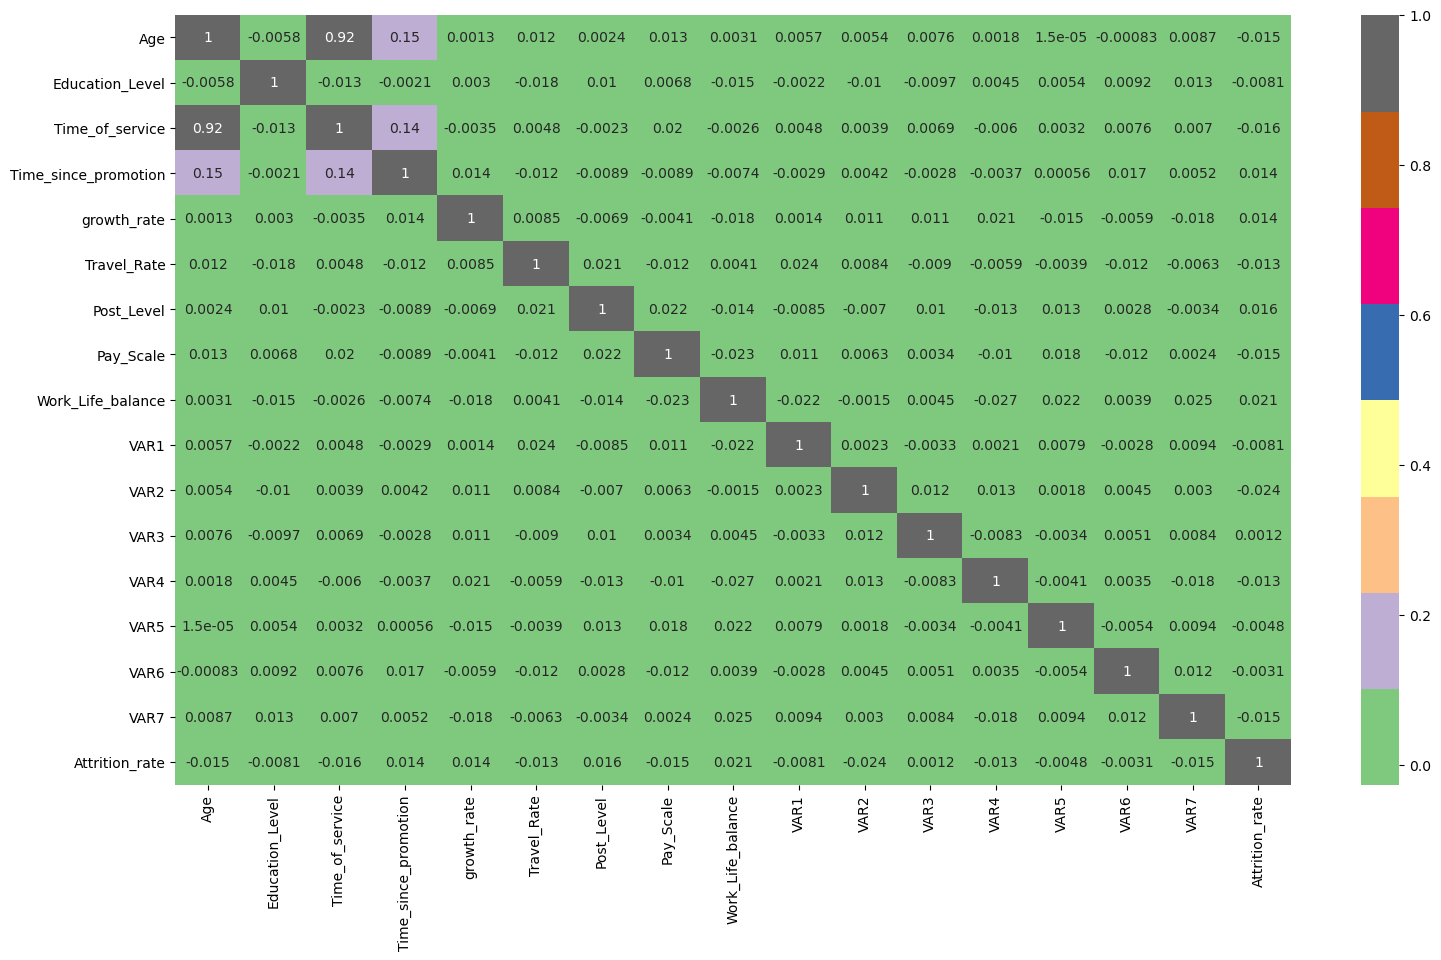

<Figure size 640x480 with 0 Axes>

In [6]:
plt.figure(figsize=(18,10))
cor = train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Accent)
plt.show()
plt.savefig("main_correlation.png")

### 모델 준비

이제 훈련을 위한 데이터를 마무리하고 모델을 준비합니다.

In [7]:
# Attrition_rate는 예측할 레이블 또는 출력입니다.
# features는 Attrition_rate를 예측하는 데 사용됩니다.
label = ["Attrition_rate"]
features = ['VAR7','VAR6','VAR5','VAR1','VAR3','growth_rate','Time_of_service','Time_since_promotion','Travel_Rate','Post_Level','Education_Level']


In [8]:
featured_data = train.loc[:,features+label]
# dropna 함수를 사용하여 누락된 값이 있는 열을 제거합니다.
featured_data = featured_data.dropna(axis=0)
featured_data.shape

(6856, 12)

In [9]:
X = featured_data.loc[:,features]
y = featured_data.loc[:,label]

In [10]:
# test size가 0.55이므로 training과 test data를 55%:45%로 분할합니다.
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1,test_size=0.55)

In [11]:
#df = Ridge(alpha=0.000001)
df = LinearRegression()
df.fit(X_train,y_train)
y_pred = df.predict(X_test)
c=[]
for i in range(len(y_pred)):
    c.append((y_pred[i][0].round(5)))
pf=c[:3000]


In [12]:
# 정확도를 출력해 봅니다.
score = 100* max(0, 1-mean_squared_error(y_test, y_pred))
print(score)

96.72970811621633


In [13]:
# 예측
import pandas as pd
dff = pd.DataFrame({'Employee_ID':test['Employee_ID'],'Attrition_rate':pf})
dff.head()

,Employee_ID,Attrition_rate
0,EID_22713,0.18662
1,EID_9658,0.20435
2,EID_22203,0.20973
3,EID_7652,0.20025
4,EID_6516,0.17774


## Task 3: 예측된 결과의 처음 20개 열 값 출력


In [14]:
#yourcodehere
dff.head(20)

,Employee_ID,Attrition_rate
0,EID_22713,0.18662
1,EID_9658,0.20435
2,EID_22203,0.20973
3,EID_7652,0.20025
4,EID_6516,0.17774
5,EID_20283,0.20274
6,EID_21014,0.18806
7,EID_7693,0.18530
8,EID_13232,0.18676
9,EID_6515,0.20339


In [1]:
sotred_dff = dff.sort_values( by='Attrition_rate', ascending = False)
sorted_dff.to.csv('sorted_results,csv', index = False)

NameError: name 'dff' is not defined

### Conclusion

이 노트북에서 우리는 기업에서 AI를 사용하여 충성할 직원을 예측하는 방법을 살펴보았습니다. 우리는 직원 감소율을 예측하기 위해 선형 회귀 모델을 만들었습니다.